## imports

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from pickle import dump
import os


In [120]:
ruta = "models/train_test_split.pkl"

with open(ruta, "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)


## Paso 1. Lectura del conjunto de datos procesado

In [121]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=122, random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)


## Paso 2: Inicialización y entrenamiento del modelo

In [106]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,122
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


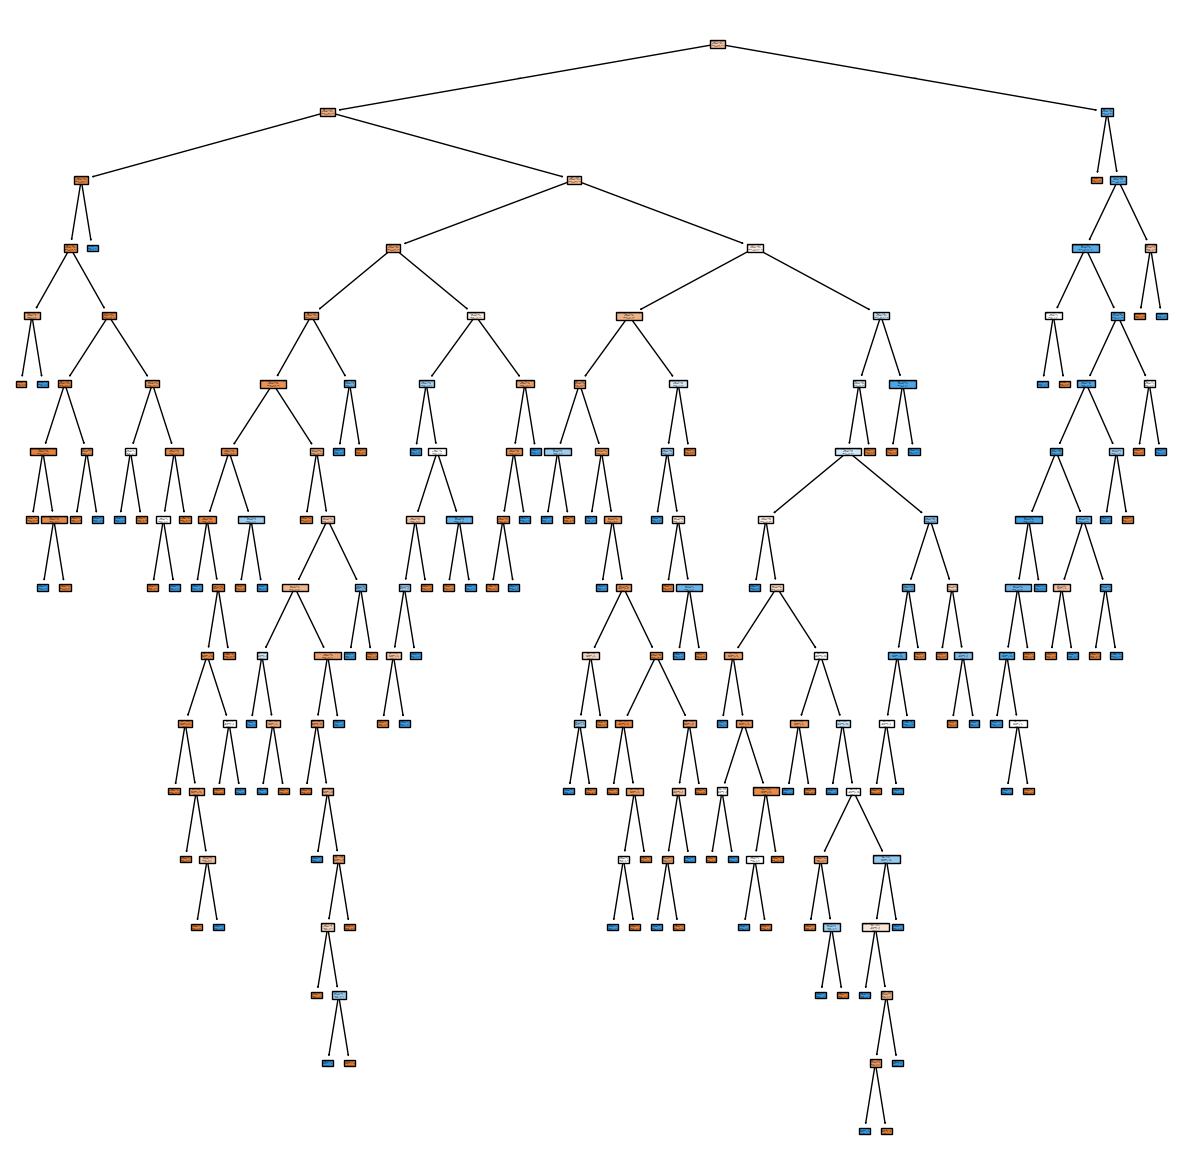

In [91]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(dt_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

## Paso 3: Predicción del modelo

In [107]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [108]:
accuracy_score(y_test, y_pred)

0.7467532467532467

## Paso 4: Guardado del modelo

In [118]:
os.makedirs("models", exist_ok=True)


In [119]:
ruta = "models/decision_tree_classifier_default_42"

with open(ruta, "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)



## Segunda prueba


In [110]:
dt_model_otro = DecisionTreeClassifier(criterion='log_loss', max_depth=122, splitter="best", random_state=42)

dt_model_otro.fit(X_train, y_train)

y_pred = dt_model_otro.predict(X_test)


In [111]:
dt_model_otro.fit(X_train, y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,122
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


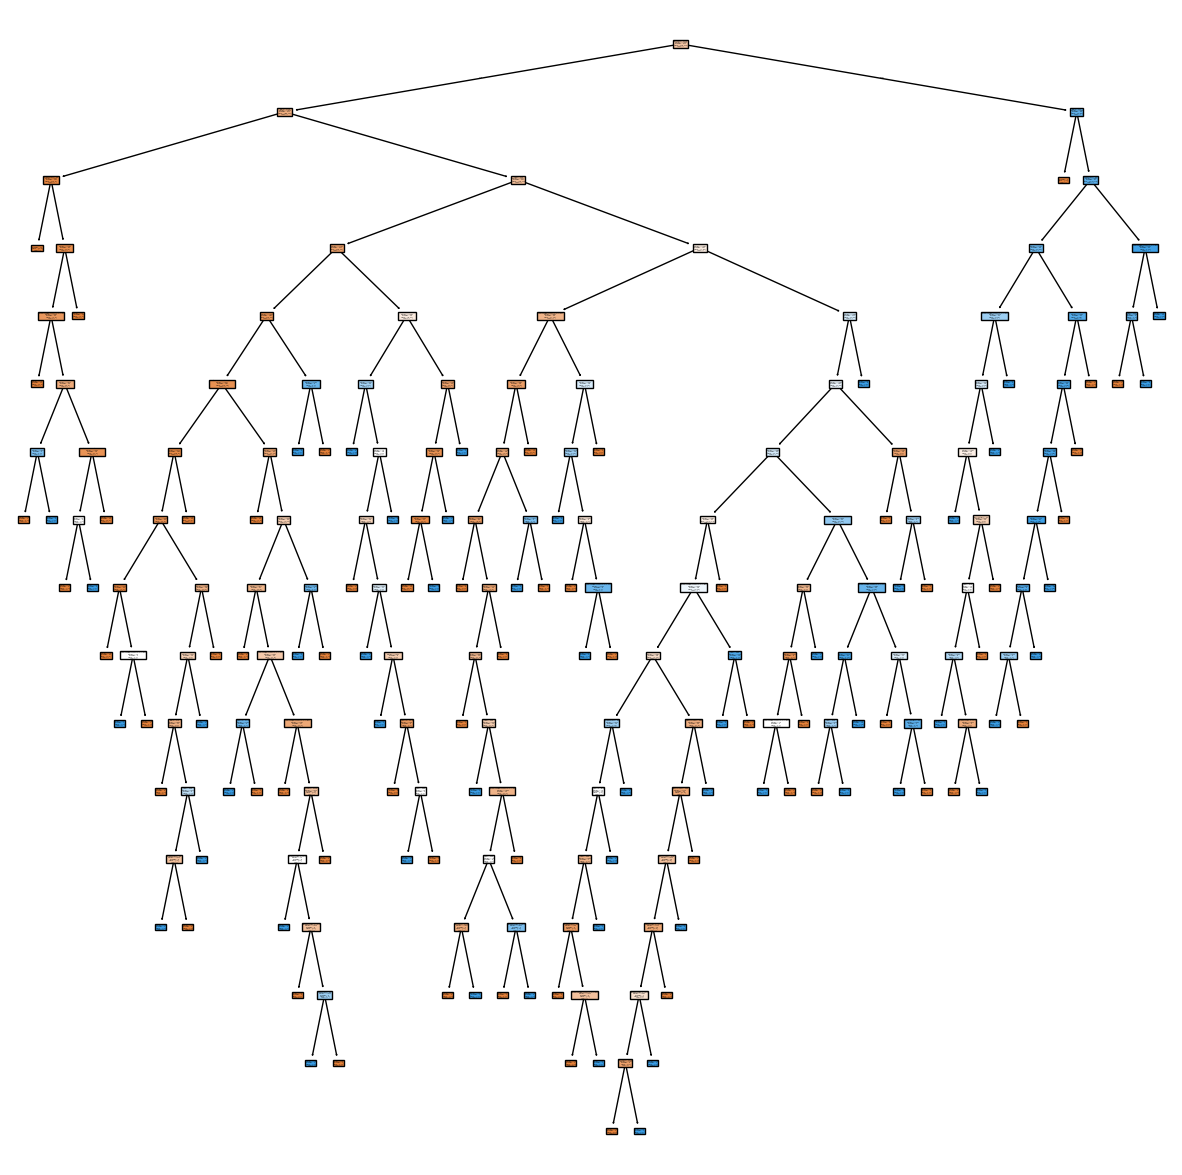

In [97]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(dt_model_otro, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [112]:
y_pred = dt_model_otro.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [113]:
accuracy_score(y_test, y_pred)

0.7077922077922078

## Conclusiones:

Con la prueba inicial, obtuvimos el mayor porcentaje de acierto.

En la segunda prueba, jugando un poco con los hiperparametros, no logramos el objetivo de subir el porcentaje de acierto.